In [1]:
import pandas as pd

In [8]:
csv = pd.read_csv('/Users/jimmyzhang/Personal/good_gov.csv', skiprows=lambda x: x in [1, 2, 3, 4], thousands=',')
csv.head()

,indicator,ISO Country code,population,surface area (Km2),Unnamed: 4,GINI index,happy planet index,human development index,world happiness report score,sustainable economic development assessment (SEDA),...,regulatory quality,rule of law,control of corruption,judicial effectiveness score,government integrity score,property rights score,tax burden score,overall economic freedom score,financial freedom score,women MPs (% of all MPs)
0,Afghanistan,AFG,36000000,652230,NaN,-,20.2,0.498,2.66,-,...,-1.3,-1.570,-1.52,28.20,26.20,17.90,91.80,51.30,10.00,27.7
1,Albania,ALB,2900000,27398,NaN,29.0,36.8,0.785,4.64,53.10,...,0.2,-0.400,-0.42,25.40,39.90,54.10,85.10,64.50,70.00,27.9
2,Algeria,DZA,41000000,2381740,NaN,35.3,33.3,0.754,5.25,45.80,...,-1.2,-0.860,-0.61,35.20,29.00,27.80,74.00,44.70,30.00,25.8
3,Andorra,AND,77000,468,NaN,-,-,0.858,-,-,...,1.2,1.600,1.24,-,-,-,-,-,-,32.1
4,Angola,AGO,30000000,1246700,NaN,42.7,-,0.581,-,28.40,...,-1.0,-1.100,-1.41,25.40,18.90,36.00,82.40,48.60,40.00,38.2


In [9]:
def process(data):
    for c in data.columns:
        if 'Unnamed' in c:
            data.drop(columns=[c], inplace=True)
    data = data.set_index('indicator')
    for c in data.columns:
        if c == 'GDP per capita (PPP)':
            data[c] = data[c].str.replace(',', '')
        
        if c != 'ISO Country code':
            
            data[c] = pd.to_numeric(data[c].replace('-', np.nan), errors='downcast')
    
    return data

In [10]:
csv = pd.read_csv('/Users/jimmyzhang/Personal/good_gov.csv', skiprows=skip, thousands=',')


NameError: name 'skip' is not defined

In [12]:
import numpy as np
csv = process(csv)

In [13]:
import scipy

In [16]:
cols = [c for c in csv.columns[22:]]
from sklearn import preprocessing

x = csv[cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=cols)




splot = pd.melt(df)

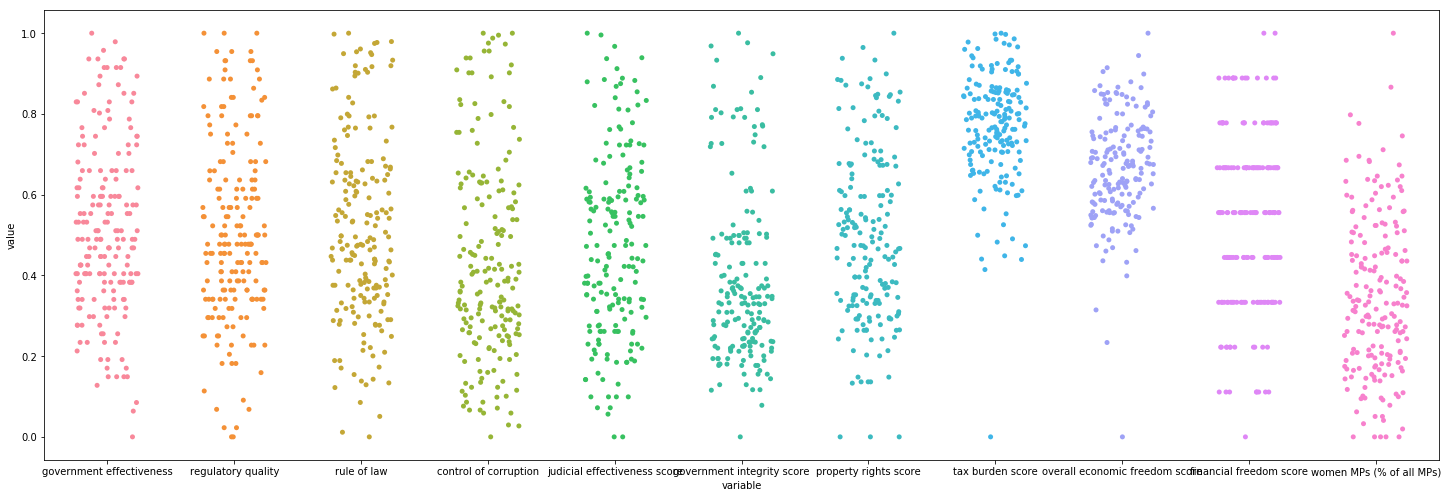

In [20]:
import matplotlib.pyplot as plt
a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
import seaborn as sns

sns.stripplot(ax=ax, x='variable', y='value', data=splot, jitter=.25)
plt.show()

In [27]:
csv.to_csv('gov_data.csv')

In [ ]:
subcsv = csv[csv.columns[20:]]
sns.heatmap(subcsv.corr(), 
            xticklabels=subcsv.columns.values,
            yticklabels=subcsv.columns.values)

In [ ]:
csv.columns

In [ ]:

for c in csv.columns[1:]:
    csv.plot(kind='scatter', x='political stability & absence of violence', y=c)